In [37]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install statsmodels
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.stattools import acf, pacf
#from prophet import Prophet
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html

 #Lendo o CSV e definindo a coluna 'id' como índice
df = pd.read_csv("/content/Dados Históricos - Petróleo Brent Futuros (8).csv")

# Adicionando uma nova coluna 'ID' com números sequenciais
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)

df.head()

,id,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,0,14.05.2024,"82,40","83,43","83,62","82,11",NaN,"-1,15%"
1,1,13.05.2024,"83,36","82,78","83,84","82,26","331,78K","0,69%"
2,2,10.05.2024,"82,79","84,21","84,53","82,70","311,45K","-1,30%"
3,3,09.05.2024,"83,88","83,79","84,33","83,45","309,45K","0,36%"
4,4,08.05.2024,"83,58","83,02","83,82","81,71","395,43K","0,71%"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4995 non-null   int64 
 1   Data      4995 non-null   object
 2   Último    4995 non-null   object
 3   Abertura  4995 non-null   object
 4   Máxima    4995 non-null   object
 5   Mínima    4995 non-null   object
 6   Vol.      4988 non-null   object
 7   Var%      4995 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.3+ KB


In [42]:
df = df.rename(columns={'Data': 'ds', 'Último': 'y'})
df.set_index('id', inplace=True)

In [47]:
# Lista das colunas a serem removidas
colunas_para_remover = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']


# Remover as colunas especificadas do DataFrame
# df = df.drop(columns=colunas_para_remover)

,ds,y
id,,
0,14.05.2024,"82,40"
1,13.05.2024,"83,36"
2,10.05.2024,"82,79"
3,09.05.2024,"83,88"
4,08.05.2024,"83,58"
...,...,...
4990,10.01.2005,"42,92"
4991,07.01.2005,"43,18"
4992,06.01.2005,"42,85"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4995 non-null   object
 1   y       4995 non-null   object
dtypes: object(2)
memory usage: 117.1+ KB


                                  ds            y
count                           4995  4995.000000
mean   2014-09-12 07:36:38.918918912    76.529722
min              2005-01-04 00:00:00    19.330000
25%              2009-11-11 12:00:00    58.140000
50%              2014-09-11 00:00:00    73.030000
75%              2019-07-15 12:00:00    95.900000
max              2024-05-14 00:00:00   146.080000
std                              NaN    24.027083


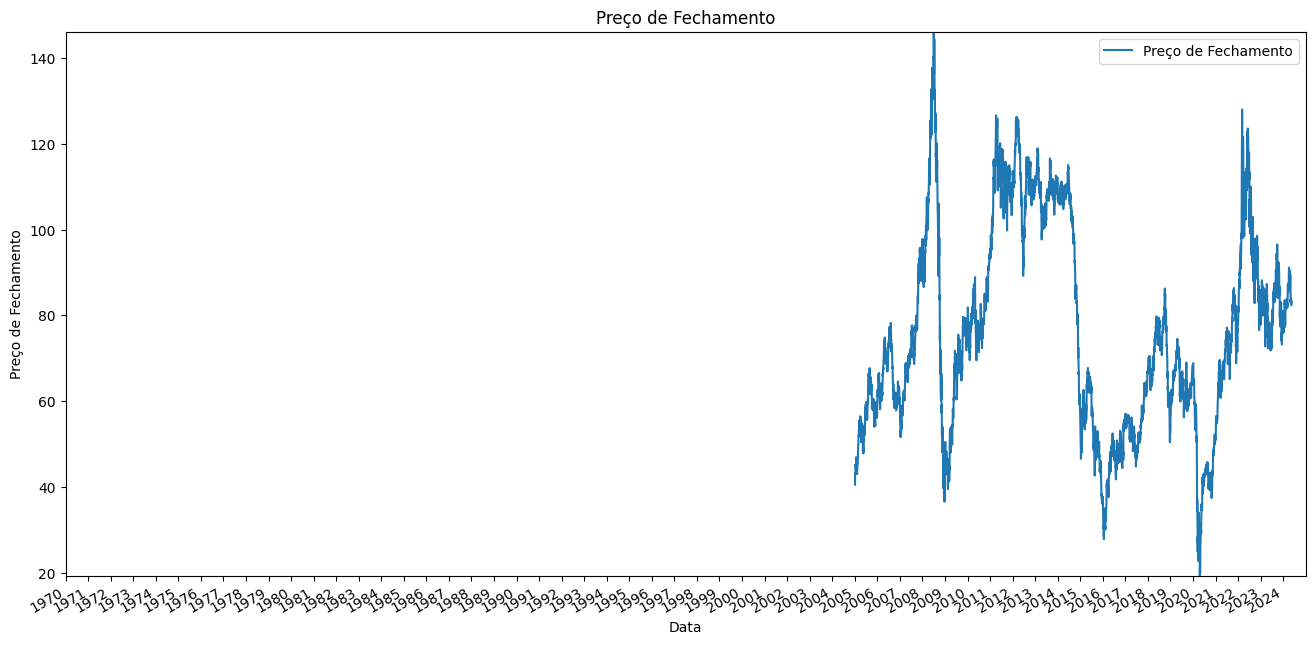

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Suponha que você tenha um DataFrame 'df' com as colunas 'ds' (datas) e 'y' (valores)
# df = ...

# Verifique e limpe os valores não válidos na coluna 'ds'
# Tente converter a coluna 'ds' para datetime e remova quaisquer linhas com falhas na conversão
df['ds'] = pd.to_datetime(df['ds'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['ds'])

# Verifique se a coluna 'y' contém valores como string e substitua vírgulas por pontos
if df['y'].dtype == 'object':
    df['y'] = df['y'].str.replace(',', '.').astype(float)
else:
    df['y'] = df['y'].astype(float)

# Verifique a distribuição dos dados
print(df.describe())

# Plotar os dados
plt.figure(figsize=(16, 8))
plt.plot(df['ds'], df['y'], label='Preço de Fechamento')

# Configurar o título e os rótulos dos eixos
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')

# Configurar o formato do eixo x para exibir apenas o ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Definir os limites do eixo x explicitamente
plt.xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('2024-12-31'))

# Ajustar os limites do eixo y para garantir que todos os dados sejam visíveis
plt.ylim(df['y'].min(), df['y'].max())

# Rotacionar os anos para melhor visualização
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()






INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1sy6x7c/7ea5u58o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1sy6x7c/zyynv_qn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73151', 'data', 'file=/tmp/tmpt1sy6x7c/7ea5u58o.json', 'init=/tmp/tmpt1sy6x7c/zyynv_qn.json', 'output', 'file=/tmp/tmpt1sy6x7c/prophet_modelkixlltwp/prophet_model-20240514171153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


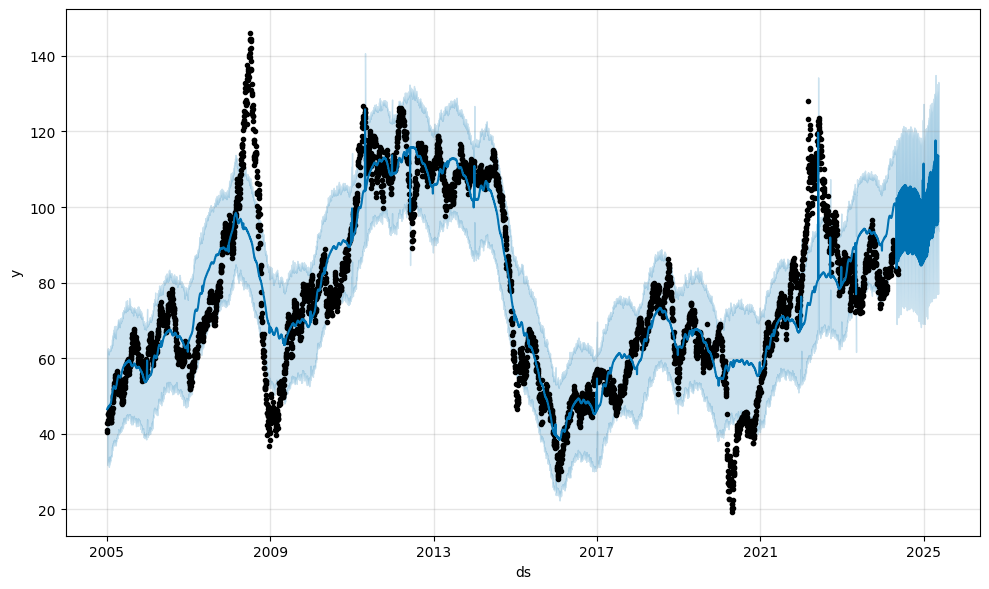

In [51]:
import pandas as pd
from prophet import Prophet
import holidays

# Suponha que você tenha um DataFrame 'df' com as colunas 'ds' (datas) e 'y' (valores)
# df = ...

# Verifique e limpe os valores não válidos na coluna 'ds'
# Tente converter a coluna 'ds' para datetime e remova quaisquer linhas com falhas na conversão
df['ds'] = pd.to_datetime(df['ds'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['ds'])

# Verifique se a coluna 'y' contém valores como string e substitua vírgulas por pontos
if df['y'].dtype == 'object':
    df['y'] = df['y'].str.replace(',', '.').astype(float)
else:
    df['y'] = df['y'].astype(float)

# Obter feriados do Reino Unido de 1970 a 2025
uk_holidays = holidays.UnitedKingdom(years=range(1970, 2026))
holiday_dates = list(uk_holidays.keys())

# Criar DataFrame de feriados
feriados_uk = pd.DataFrame({
    'holiday': 'feriados_uk',
    'ds': pd.to_datetime(holiday_dates),
    'lower_window': 0,
    'upper_window': 1,
})

# Inicializar o modelo Prophet e adicionar feriados do Reino Unido
m = Prophet()
m.add_country_holidays(country_name='UK')

# Adicionar fins de semana
# Crie uma função para identificar fins de semana
def is_weekend(date):
    return date.weekday() >= 5

# Adicionar coluna de fim de semana ao DataFrame
df['weekend'] = df['ds'].apply(is_weekend).astype(int)

# Adicionar coluna de feriados ao DataFrame
df['feriados_uk'] = df['ds'].isin(holiday_dates).astype(int)

# Adicionar fins de semana e feriados ao modelo Prophet
m.add_regressor('weekend')
m.add_regressor('feriados_uk')

# Ajustar o modelo com os dados
m.fit(df)

# Fazer previsões
future = m.make_future_dataframe(periods=365)
future['weekend'] = future['ds'].apply(is_weekend).astype(int)
future['feriados_uk'] = future['ds'].isin(holiday_dates).astype(int)

# Prever e visualizar
forecast = m.predict(future)
fig = m.plot(forecast)





